# Exploring the Data

Imports

In [1]:
import pandas as pd
import utils as u
import numpy as np
import matplotlib.pyplot as plt

## Data Exploration
### `sales_train.csv`
**Columns**
* `unique_id` - unique id for inventory
* `date` - date
* `warehouse` - warehouse name
* `total_orders` - historical orders for selected Rohlik warehouse **known also for test set**
* `sell_price_main` - sell price
* `type_0_discount`, `type_1_discount`, … - Rohlik is running different types of promo sale actions, these show the percentage of the original price during promo ((original price - current_price) / original_price). Multiple discounts with different type can be run at the same time, **but always the highest possible discount among these types is used for sales. Negative discount value should be interpreted as no discount.**
* `availability` - proportion of the day that the inventory was available to customers. The inventory doesn't need to be available at all times. A value of 1 means it was available for the entire day. This column **is missing in test.csv** as it is not known at the moment of making the prediction.
* `sales` - **Target value**, sales volume (either in pcs or kg) **adjusted by availability**. The sales with lower availability than 1 are already adjusted to full potential sales by Rohlik internal logic. There might be missing dates both in train and test for a given inventory due to various reasons. This column is missing in test.csv as it is target variable.

Because `availability` is not known at test time, and it's not being predicted, we will simply ignore this feature.

In [2]:
df = pd.read_csv('./data/sales_train.csv')
display(df.head())
display(df.describe())
display(df.dtypes)
display(df.isna().sum())

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
0,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,1.00,0.00000,0.0,0.0,0.0,0.15312,0.0,0.0
1,4845,2021-05-25,Budapest_1,4663.0,12.63,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0
2,4845,2021-12-20,Budapest_1,6507.0,34.55,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0
3,4845,2023-04-29,Budapest_1,5463.0,34.52,646.26,0.96,0.20024,0.0,0.0,0.0,0.15312,0.0,0.0
4,4845,2022-04-01,Budapest_1,5997.0,35.92,486.41,1.00,0.00000,0.0,0.0,0.0,0.15649,0.0,0.0


,unique_id,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
count,4.007419e+06,4.007367e+06,4.007367e+06,4.007419e+06,4.007419e+06,4.007419e+06,4.007419e+06,4.007419e+06,4.007419e+06,4.007419e+06,4.007419e+06,4.007419e+06
mean,2.740801e+03,5.995722e+03,1.083808e+02,1.814199e+02,9.253107e-01,8.518626e-03,1.240899e-04,1.163193e-03,5.452819e-06,5.680178e-03,4.049705e-04,1.045480e-02
std,1.558566e+03,2.479598e+03,3.603327e+02,4.611014e+02,1.796205e-01,5.147027e-02,5.142815e-03,1.879977e-02,8.922436e-04,2.892965e-02,9.199913e-03,5.545035e-02
min,0.000000e+00,4.580000e+02,0.000000e+00,2.000000e-02,1.000000e-02,-2.094930e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.712000e-02,0.000000e+00,-8.014900e-01
25%,1.398000e+03,4.402000e+03,1.798000e+01,2.113000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.744000e+03,5.515000e+03,3.952000e+01,4.564000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.084000e+03,8.011000e+03,9.447000e+01,1.121300e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.431000e+03,1.847500e+04,2.631619e+04,2.168299e+04,1.000000e+00,9.916400e-01,5.000000e-01,7.637200e-01,2.506300e-01,4.529000e-01,6.691400e-01,9.000500e-01


unique_id            int64
date                object
warehouse           object
total_orders       float64
sales              float64
sell_price_main    float64
availability       float64
type_0_discount    float64
type_1_discount    float64
type_2_discount    float64
type_3_discount    float64
type_4_discount    float64
type_5_discount    float64
type_6_discount    float64
dtype: object

unique_id           0
date                0
warehouse           0
total_orders       52
sales              52
sell_price_main     0
availability        0
type_0_discount     0
type_1_discount     0
type_2_discount     0
type_3_discount     0
type_4_discount     0
type_5_discount     0
type_6_discount     0
dtype: int64

A few notes for preprocessing:
* Out of millions of datapoints, there are 52-104 that have missing values for the target (`sales`) or `total_orders`. It's best to drop these, as they make up an insignificant proportion of the data.
* We should make `date` a DateTime object for modeling purposes.
* `availability` is not known at test time, so we should drop this.
* The given data explanation states that negative discounts should be treated as no discount, so we will transform each discount to max(0, discount). Also, the highest discount is the only one applied, so a `top_discount` column should be added.

In [3]:
df.dropna(inplace=True)

df['date'] = pd.to_datetime(df['date'])

df.drop('availability', axis=1, inplace=True)

discounts = [f'type_{i}_discount' for i in range(7)]
df[discounts] = df[discounts].map(lambda x: max(x, 0))
df['top_discount'] = df[discounts].apply(lambda x: np.max(x), axis=1)

### `unique_id`

In [4]:
unique_ids = df['unique_id'].value_counts()
display(unique_ids.describe())
display(unique_ids.head(50))
display(unique_ids.tail(50))

count    5390.000000
mean      743.481818
std       496.798923
min         7.000000
25%       260.000000
50%       731.000000
75%      1283.750000
max      1402.000000
Name: count, dtype: float64

unique_id
2602    1402
1997    1402
2935    1402
4611    1402
2560    1402
4710    1402
4610    1402
1998    1402
80      1402
4755    1402
4540    1402
2125    1402
1176    1402
4523    1402
2562    1402
2187    1401
1999    1401
2567    1401
2564    1401
1996    1401
2945    1401
2561    1401
4233    1401
2123    1401
4046    1401
2565    1401
2563    1401
4403    1401
4709    1401
2583    1401
4236    1401
2938    1401
2232    1400
2979    1400
4235    1400
4626    1400
393     1400
2339    1400
4627    1400
3125    1400
4198    1400
4402    1400
4234    1400
730     1400
4904    1400
4525    1400
4857    1399
5288    1399
4524    1399
2336    1399
Name: count, dtype: int64

unique_id
225     14
1836    14
1769    13
3018    13
4997    13
1535    13
134     13
5227    13
1784    13
3568    12
4889    12
4998    12
2263    12
5148    12
660     11
1724    11
136     11
133     11
1291    11
4457    11
4982    11
1772    11
4458    11
2484    11
135     11
2751    10
1503    10
3078    10
4817    10
1081    10
2732    10
2752    10
1860     9
2158     9
2750     9
4459     9
2802     8
70       8
773      8
4283     8
1218     8
4497     8
1200     8
3099     7
243      7
2459     7
3865     7
4940     7
1198     7
4941     7
Name: count, dtype: int64

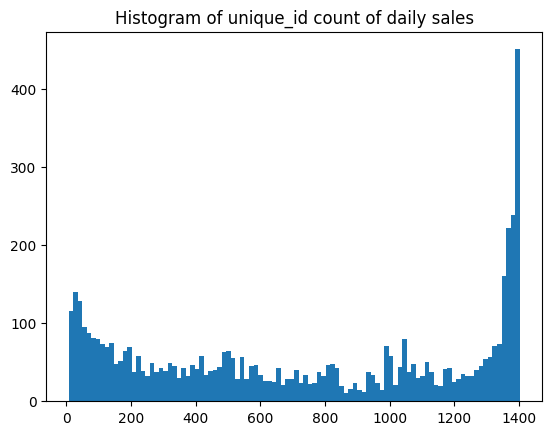

In [7]:
plt.hist(unique_ids, bins=100)
plt.title('Histogram of unique_id count of daily sales')
plt.show()

Wow, so the `unique_id`-based forecasts will have a wide range of available data. I wonder if we need to generate forecasts for each of these products. Let's investigate.

In [11]:
test = pd.read_csv('./data/sales_test.csv')
test_ids = test['unique_id'].unique()
print(f"Number of Unique IDs to forecast {len(test_ids)}")

Number of Unique IDs to forecast 3625


So, no. There are at least a thousand products for which we do not need to generate forecasts. Let's check the amount of data for the required forecasts.

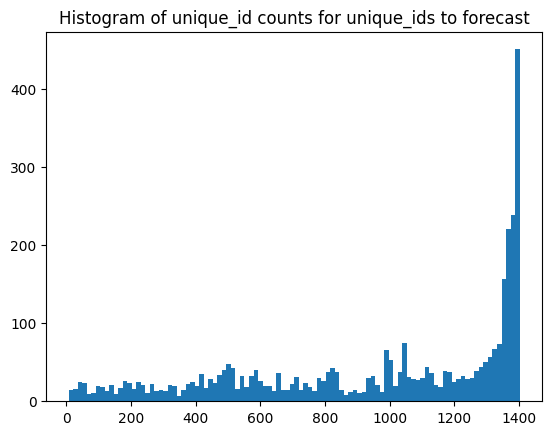

In [12]:
plt.hist(unique_ids[test_ids], bins=100)
plt.title('Histogram of unique_id counts for unique_ids to forecast')
plt.show()

Luckily, the left tail has decreased significantly. However, even the data we are not required to forecast will play a role in predicting category-based aggregates.

### `warehouse`

In [4]:
warehouses = df['warehouse'].value_counts()
warehouses.sort_values(ascending=False)
display(warehouses.head(20))

warehouse
Prague_1       780566
Prague_3       779655
Prague_2       770709
Brno_1         643637
Budapest_1     574582
Munich_1       259287
Frankfurt_1    198931
Name: count, dtype: int64

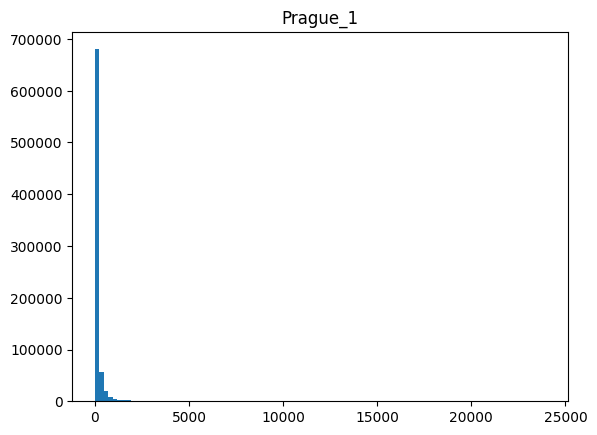

146.6350525772324


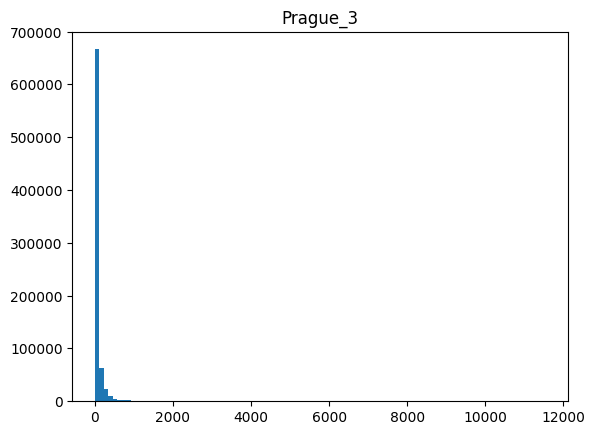

78.31488336507815


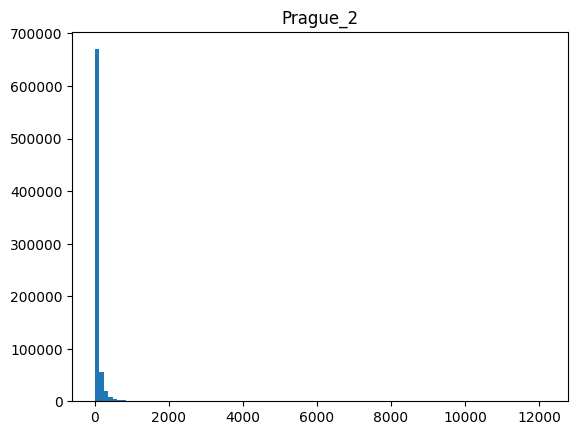

75.20067793421384


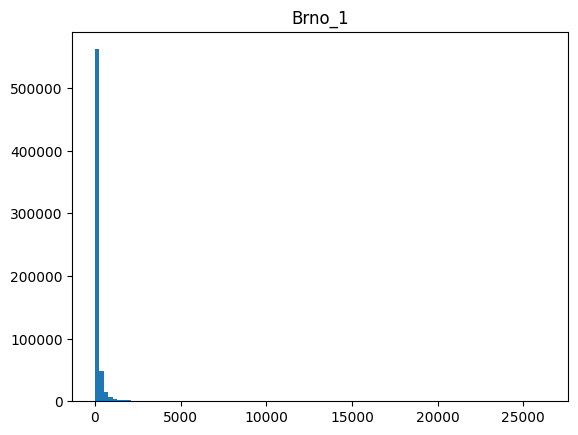

165.8145697497191


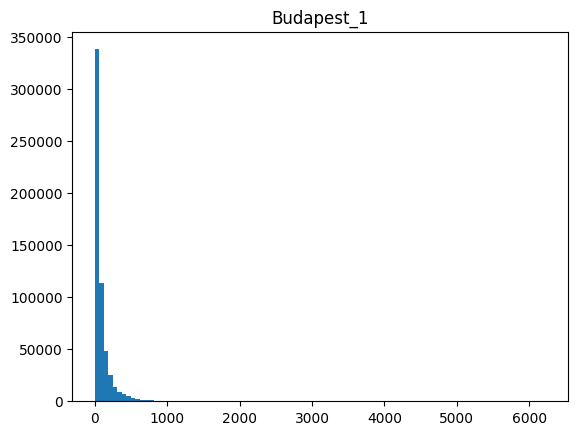

102.9342223042142


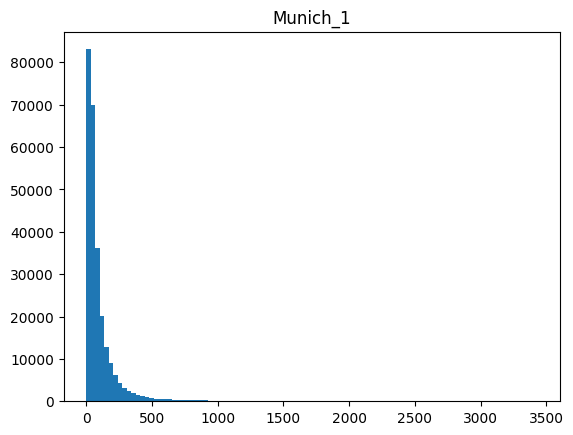

99.51992309680006


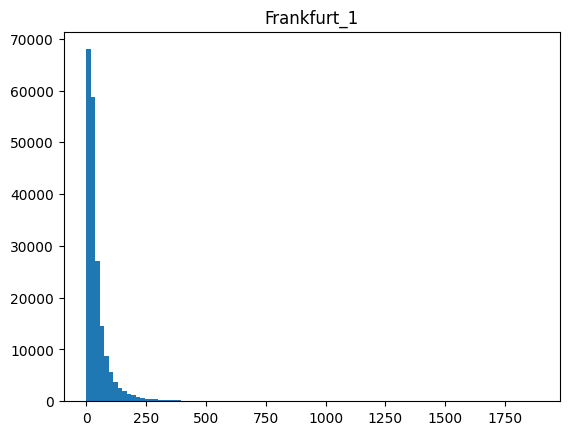

46.11609698840302


In [5]:
for warehouse in warehouses.index:
    sales = df.loc[df['warehouse'] == warehouse]['sales']
    plt.hist(sales, bins=100)
    plt.title(warehouse)
    plt.show()
    print(sales.mean())

Let's log-transform the sales. Since some are 0, we'll add a 0.01 to the argument.

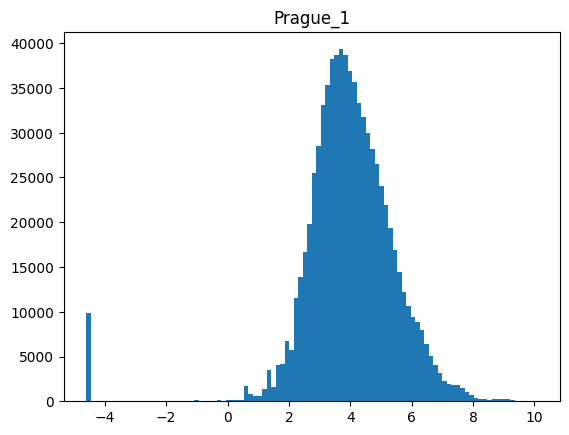

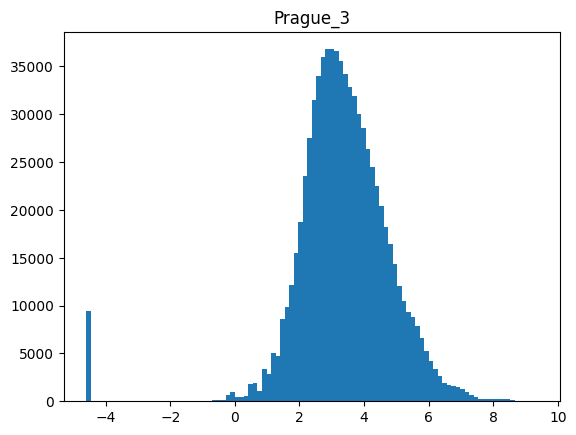

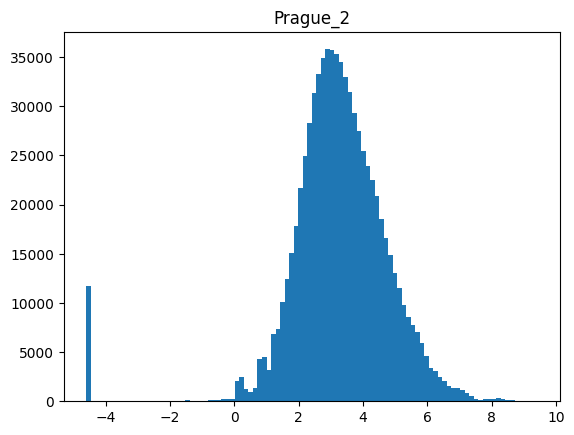

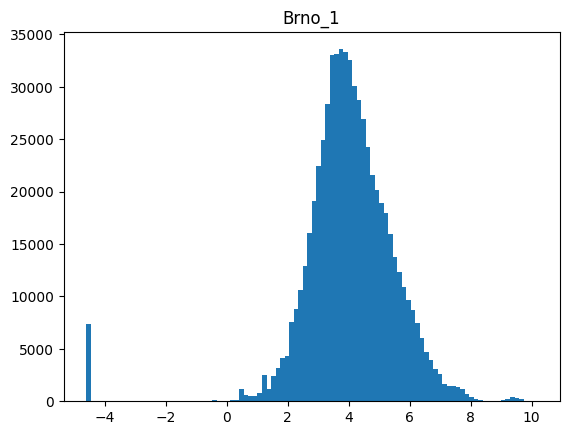

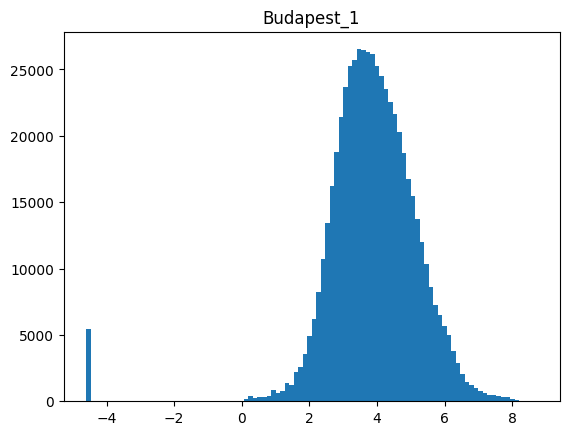

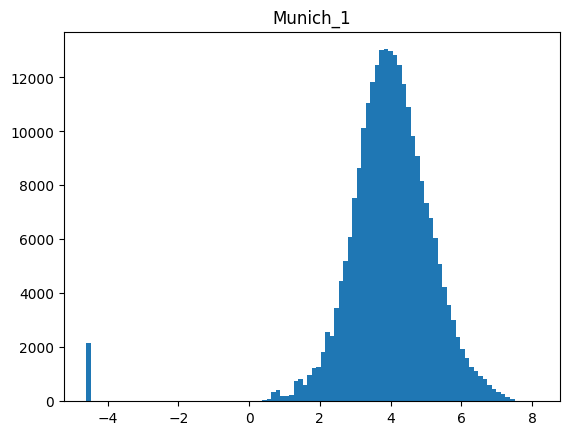

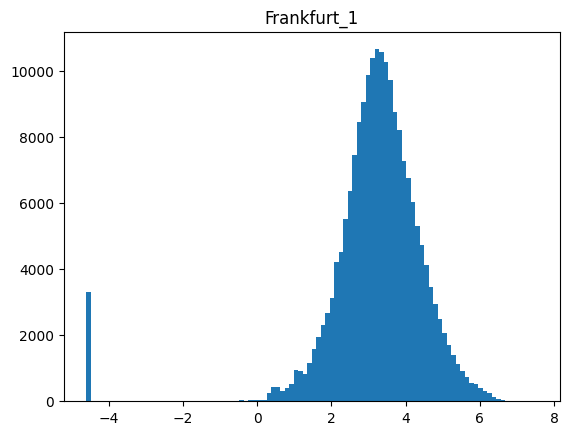

In [6]:
for warehouse in warehouses.index:
    sales = df.loc[df['warehouse'] == warehouse]['sales']
    mean = sales.mean()
    sales = sales.apply(lambda x: np.log(0.01 + x))
    plt.hist(sales, bins=100)
    plt.title(warehouse)
    plt.show()

Clearly, log(sales) is the "better" target, as it's highly normal. Furthermore, the case of 0 sales is easily fixed by the epsilon = 0.01 added to the argument of the logarithm. Then, the case of zero sales is just the extreme left of the distribution.

In [7]:
prague_1 = df.loc[df['warehouse'] == 'Prague_1']
print(f"Unique products for Prague_1 Warehouse: {len(prague_1['unique_id'].unique())}")
product_ids = prague_1['unique_id'].value_counts()
product_ids.head()

Unique products for Prague_1 Warehouse: 857


unique_id
4611    1402
4755    1402
1998    1402
2562    1402
4403    1401
Name: count, dtype: int64

C:\Users\ttfee\AppData\Local\Temp\ipykernel_28712\2176633687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_4611.sort_values('date', inplace=True)


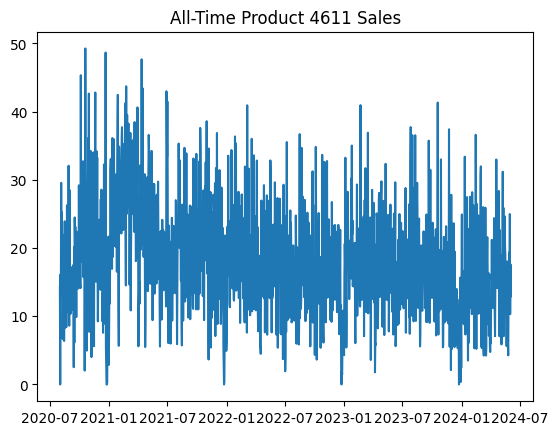

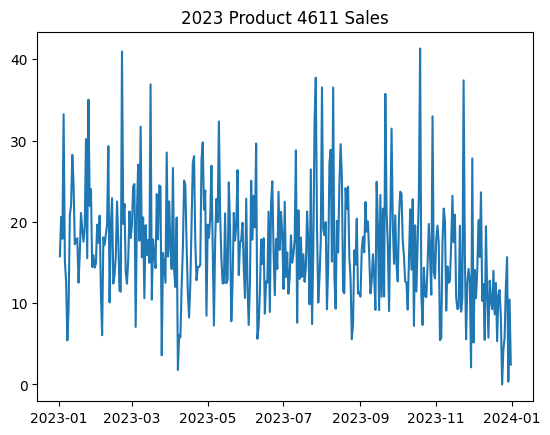

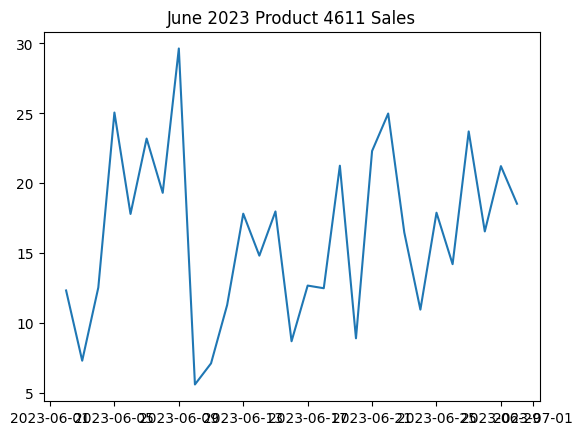

In [8]:
product_4611 = prague_1.loc[prague_1['unique_id'] == 4611]
product_4611.sort_values('date', inplace=True)
plt.plot(product_4611['date'], product_4611['sales'])
plt.title('All-Time Product 4611 Sales')
plt.show()

oneyear = product_4611.loc[(product_4611['date'] > '2023-01-01') & (product_4611['date'] < '2024-01-01')]
plt.plot(oneyear['date'], oneyear['sales'])
plt.title('2023 Product 4611 Sales')
plt.show()

onemonth = product_4611.loc[(product_4611['date'] > '2023-06-01') & (product_4611['date'] < '2023-07-01')]
plt.plot(onemonth['date'], onemonth['sales'])
plt.title('June 2023 Product 4611 Sales')
plt.show()

#### Aggregate Sales Trend

,sales
date,
2020-08-01,172887.14
2020-08-02,177492.77
2020-08-03,194435.96
2020-08-04,176477.44
2020-08-05,171293.07
...,...
2024-05-29,362484.19
2024-05-30,395672.84
2024-05-31,497098.91


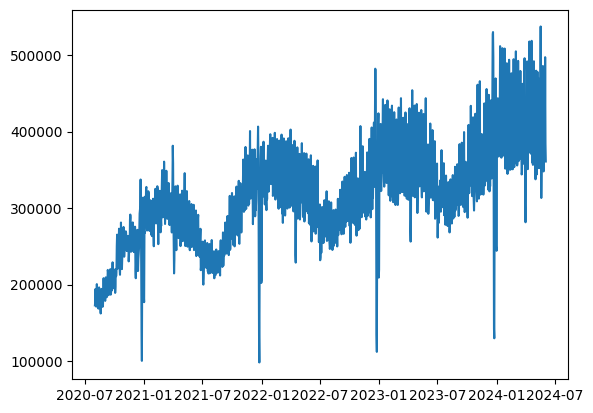

In [9]:
aggregated = df[['date', 'sales']].groupby(['date']).sum()
display(aggregated)
plt.plot(aggregated.index, aggregated['sales'])

...  Christmas?

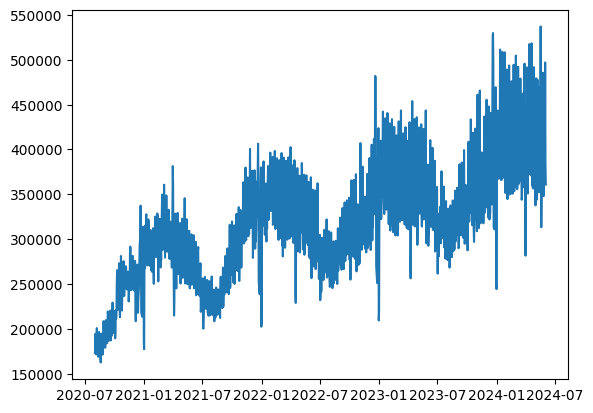

In [10]:
grinch = aggregated.drop(index=['2020-12-25', '2021-12-25', '2022-12-25', '2023-12-25', 
                                '2020-12-24', '2021-12-24', '2022-12-24', '2023-12-24'])
plt.plot(grinch)

Unsurprisingly, there are incredible peaks and troughs around the holiday season. We'll add some flag variables later, available in the `calendar.csv` dataset.

##### By Warehouse

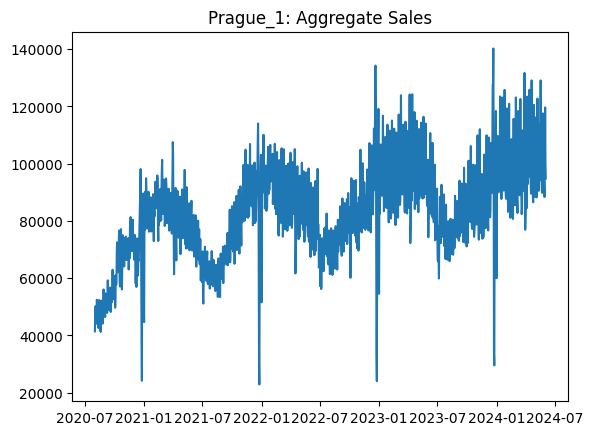

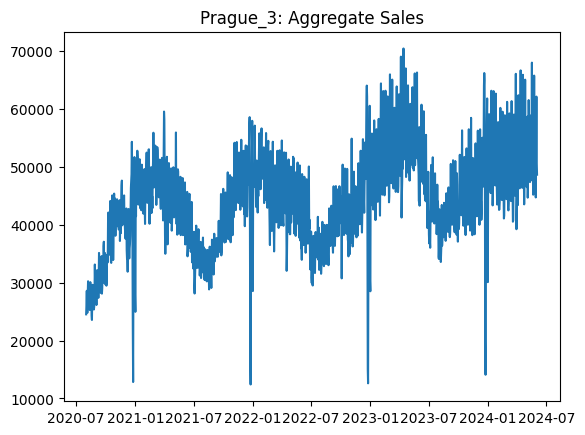

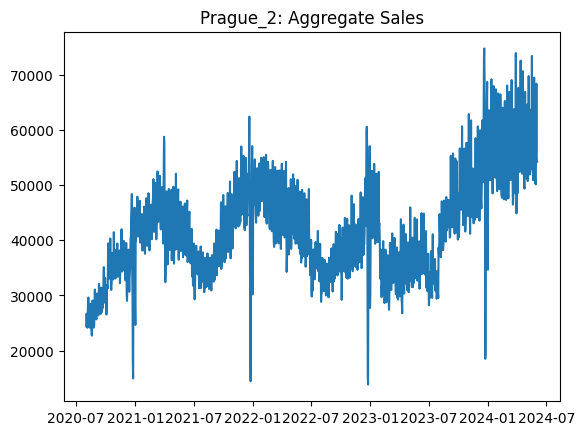

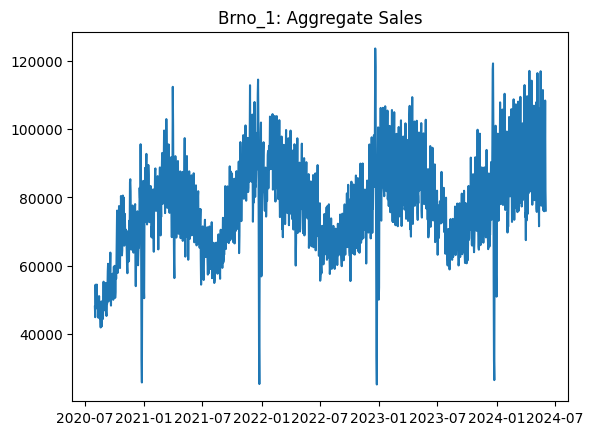

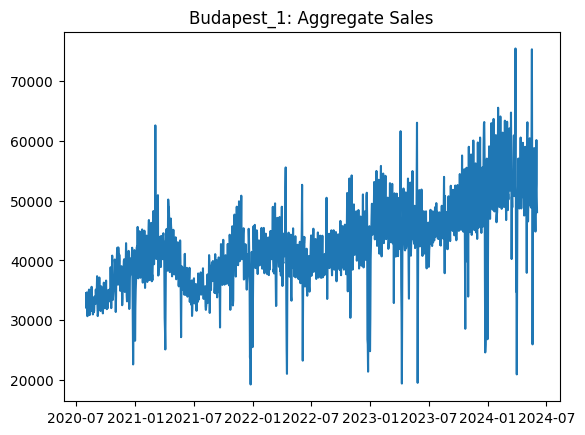

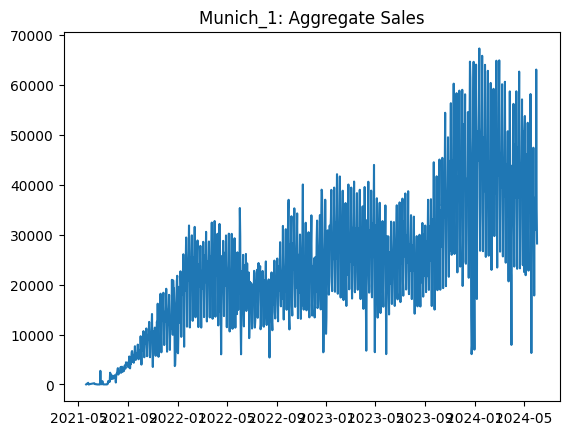

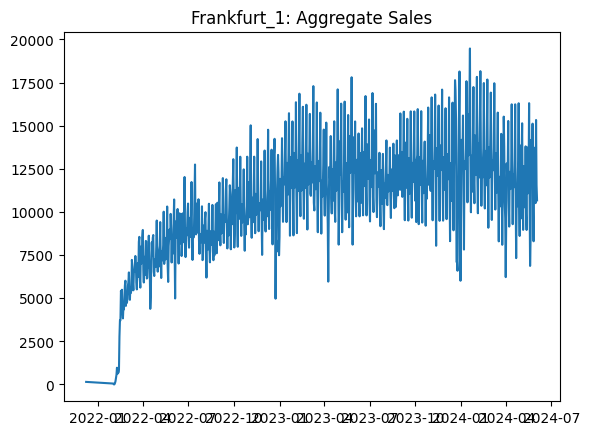

In [11]:
for warehouse in warehouses.index:
    warehouse_df = df.loc[df['warehouse'] == warehouse]
    aggregated = warehouse_df[['date', 'sales']].groupby(['date']).sum()
    plt.plot(aggregated.index, aggregated['sales'])
    plt.title(f'{warehouse}: Aggregate Sales')
    plt.show()

The Prague warehouses have very similar aggregate data, except for the anomolous sunken sales in Prague_2 from around January to September 2023. The Prague_3 warehouse seems to absorb the drop in Prague_2 warehouse sales (likely internal transfer of volume -- reconstruction or something).
*Note:* **We should be careful with this, as our goal is to predict sales in early June 2024.**

As the other Czech Republic location, Brno_1 also shares a similar distribution.

The Budapest warehouse, even with the same four year history, has much less annual seasonality. Unfortunately, it has no compatriot warehouses to compare against.

The German locations are much newer. The Frankfurt location might benefit from a short-term weekly model.

Let's aggregate by country.

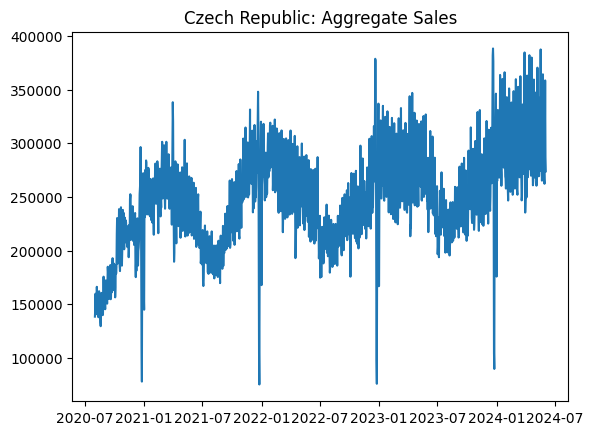

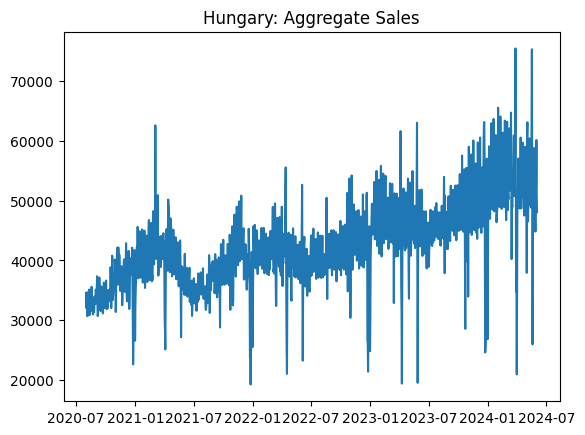

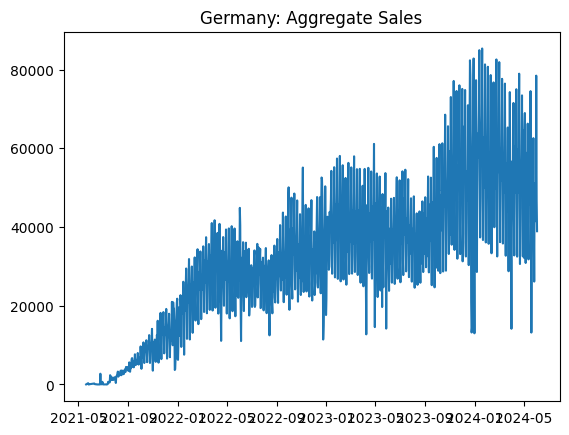

In [12]:
warehouse_to_country = {
    'Prague_1': 'Czech Republic',
    'Prague_2': 'Czech Republic',
    'Prague_3': 'Czech Republic',
    'Brno_1': 'Czech Republic',
    'Budapest_1': 'Hungary',
    'Munich_1': 'Germany',
    'Frankfurt_1': 'Germany'
}

df['country'] = df['warehouse'].apply(lambda x: warehouse_to_country[x])
for country in ['Czech Republic', 'Hungary', 'Germany']:
    country_df = df.loc[df['country'] == country]
    aggregated = country_df[['date', 'sales']].groupby(['date']).sum()
    plt.plot(aggregated.index, aggregated['sales'])
    plt.title(f'{country}: Aggregate Sales')
    plt.show()

As the Frankfurt location plateaus, the Munich warehouse explodes with volume. Aggregating across Germany, the trend looks more predictable. Since the Frankfurt warehouse is newer, it's likely that Munich is absorbing some of the volume.

### `inventory.csv`
#### Columns
* `unique_id` - inventory id for a single keeping unit
* `product_unique_id` - product id, inventory in each warehouse has the same product unique id (**same products across all warehouses has the same product id, but different unique id**)
* `name` - inventory id for a single keeping unit
* `L1_category_name`, `L2_category_name`, … - name of the internal category, *the higher the number, the more granular information is present*
* `warehouse` - warehouse name

In [13]:
inventory = pd.read_csv('./data/inventory.csv')
display(inventory.head())
display(inventory.describe())
display(inventory.dtypes)
display(inventory.isna().sum())

,unique_id,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en,warehouse
0,5255,2583,Pastry_196,Bakery,Bakery_L2_14,Bakery_L3_26,Bakery_L4_1,Prague_3
1,4948,2426,Herb_19,Fruit and vegetable,Fruit and vegetable_L2_30,Fruit and vegetable_L3_86,Fruit and vegetable_L4_1,Prague_3
2,2146,1079,Beet_2,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_65,Fruit and vegetable_L4_34,Prague_1
3,501,260,Chicken_13,Meat and fish,Meat and fish_L2_13,Meat and fish_L3_27,Meat and fish_L4_5,Prague_1
4,4461,2197,Chicory_1,Fruit and vegetable,Fruit and vegetable_L2_17,Fruit and vegetable_L3_33,Fruit and vegetable_L4_1,Frankfurt_1


,unique_id,product_unique_id
count,5432.000000,5432.000000
mean,2715.500000,1344.782769
std,1568.227662,764.094002
min,0.000000,0.000000
25%,1357.750000,690.000000
50%,2715.500000,1349.500000
75%,4073.250000,2002.000000
max,5431.000000,2669.000000


unique_id               int64
product_unique_id       int64
name                   object
L1_category_name_en    object
L2_category_name_en    object
L3_category_name_en    object
L4_category_name_en    object
warehouse              object
dtype: object

unique_id              0
product_unique_id      0
name                   0
L1_category_name_en    0
L2_category_name_en    0
L3_category_name_en    0
L4_category_name_en    0
warehouse              0
dtype: int64

It looks like `unique_id` gets every integer from 0 to 5431. The `L{i}_category_name_en` feature lets us choose the fineness with which we can aggregate the products. Since the categories play the role of natural grouping, `name` will only serve an explanatory role.

In [14]:
print(f"Unique Products: {len(inventory['product_unique_id'].unique())}")
print(f"Unique L1 Categories: {len(inventory['L1_category_name_en'].unique())}")
print(f"Unique L2 Categories: {len(inventory['L2_category_name_en'].unique())}")
print(f"Unique L3 Categories: {len(inventory['L3_category_name_en'].unique())}")
print(f"Unique L4 Categories: {len(inventory['L4_category_name_en'].unique())}")

Unique Products: 2670
Unique L1 Categories: 3
Unique L2 Categories: 47
Unique L3 Categories: 177
Unique L4 Categories: 68


The data explanations claimed L{i} categories increased in granularity, but L4 has less categories than L3.
Here's a side-by-side to help understand the categories.

Product   | L1                  | L2                        | L3                        | L4
----------|---------------------|---------------------------|---------------------------|-------------------------
Herb_19   |	Fruit and vegetable | Fruit and vegetable_L2_30 | Fruit and vegetable_L3_86 | Fruit and vegetable_L4_1
Chicory_1 |	Fruit and vegetable | Fruit and vegetable_L2_17 | Fruit and vegetable_L3_33 | Fruit and vegetable_L4_1

Herb_19 and Chicory_1 have the same L1 and L4 but different L2 and L3 categories. So, even though L2 has less categories overall than L4, L4 does not distinguish between the products whereas L2 does. We can conclude that the categories are not necessarily hierarchical.

### Product-Level Aggregation

Because the data is relatively small and variable for a single product in a single warehouse, we will need to utilize some aggregation. There are two natural first directions:
1. Measuring the similarities for a single product across different warehouses.
2. Measuring the similarities within a category for a given warehouse.

In [2]:
inventory = pd.read_csv('./data/inventory.csv')

unq_to_L1 = {}
for _, row in inventory.iterrows():
    unq_to_L1[row['unique_id']] = row['L1_category_name_en']
df['L1'] = df['unique_id'].apply(lambda x: unq_to_L1[x])

NameError: name 'pd' is not defined

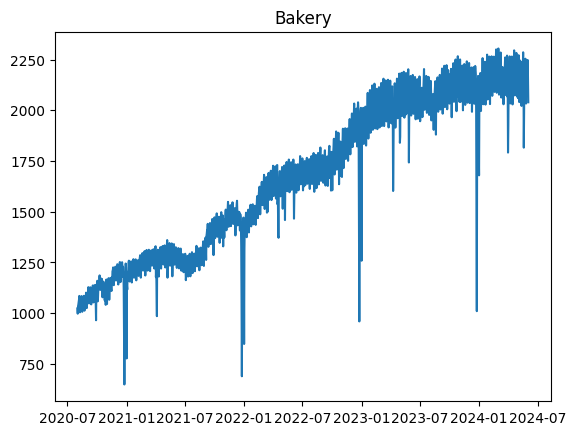

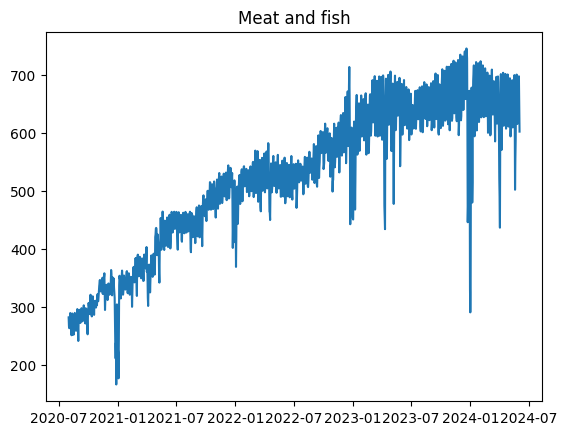

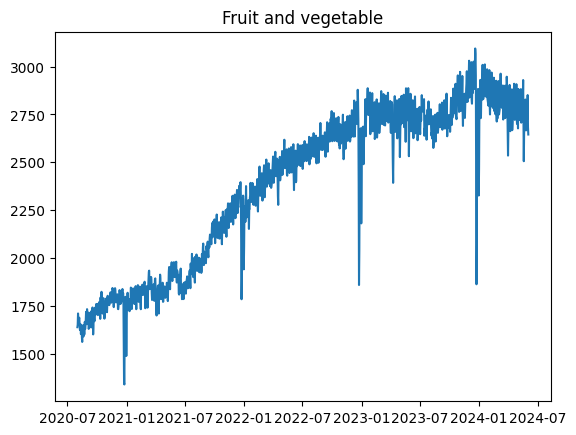

In [ ]:
for cat in df['L1'].unique():
    cat_df = df.loc[df['L1'] == cat, ['date', 'sales']]
    cat_df['power_sales'] = cat_df['sales'].apply(lambda x: x**(1/8))
    prod_agg = cat_df[['date', 'power_sales']].groupby('date').sum()
    plt.plot(prod_agg)
    plt.title(cat)
    plt.show()

Let's subtract the linear trend.

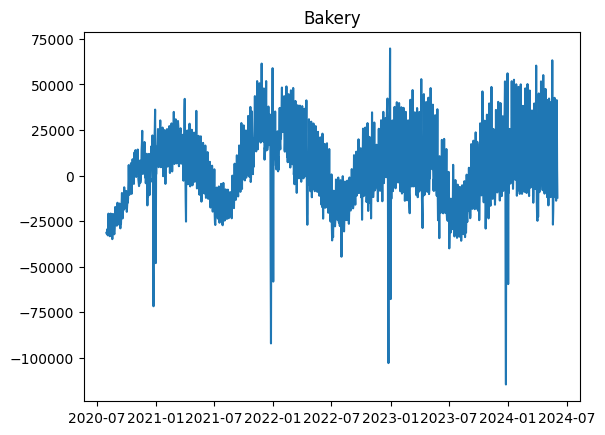

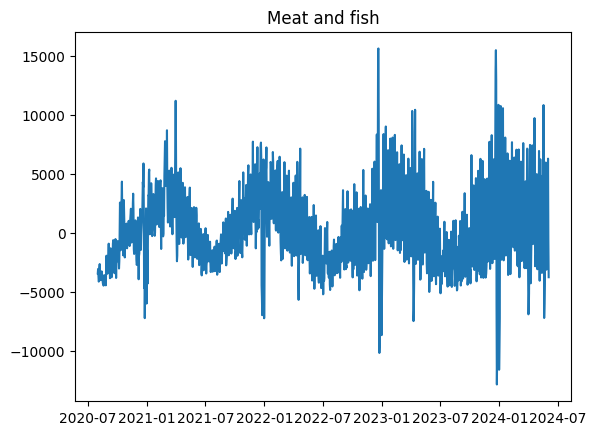

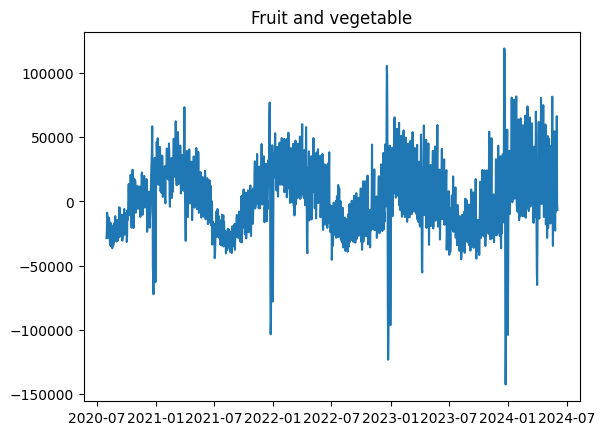

In [ ]:
from sklearn.linear_model import LinearRegression
for cat in df['L1'].unique():
    cat_df = df.loc[df['L1'] == cat]
    prod_agg = cat_df[['date', 'sales']].groupby('date').sum()
    linear = LinearRegression().fit(prod_agg.index.astype(int).to_numpy().reshape(-1,1), prod_agg['sales'])
    plt.plot(prod_agg['sales'] - linear.predict(prod_agg.index.astype(int).to_numpy().reshape(-1, 1)))
    plt.title(cat)
    plt.show()

The variance grow with time, so let's try a log-transform first.

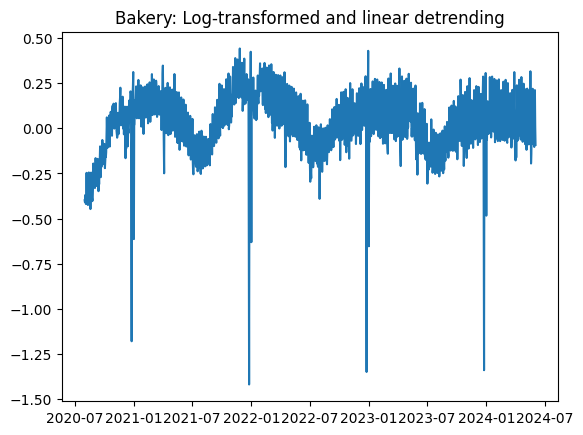

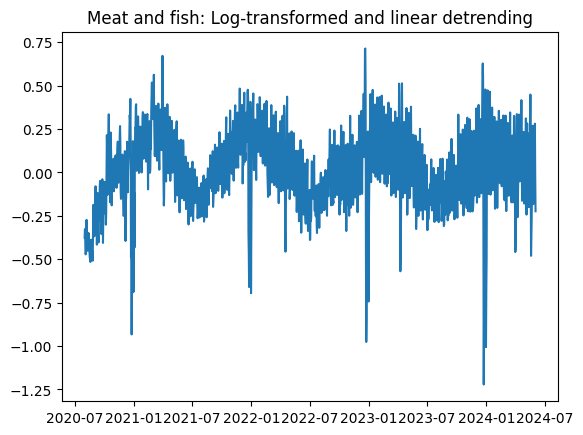

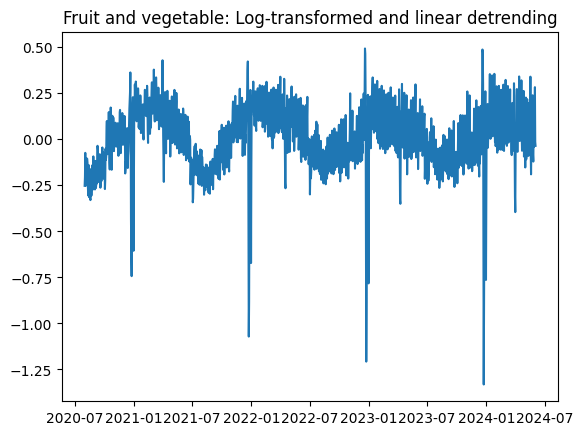

In [ ]:
from sklearn.linear_model import LinearRegression
for cat in df['L1'].unique():
    cat_df = df.loc[df['L1'] == cat]
    prod_agg = cat_df[['date', 'sales']].groupby('date').sum()
    prod_agg['sales'] = prod_agg['sales'].apply(lambda x: np.log(x))
    linear = LinearRegression().fit(prod_agg.index.astype(
        int).to_numpy().reshape(-1, 1), prod_agg['sales'])
    plt.plot(prod_agg['sales'] -
             linear.predict(prod_agg.index.astype(int).to_numpy().reshape(-1, 1)))
    plt.title(f'{cat}: Log-transformed and linear detrending')
    plt.show()

Let's zoom in on the holidays.

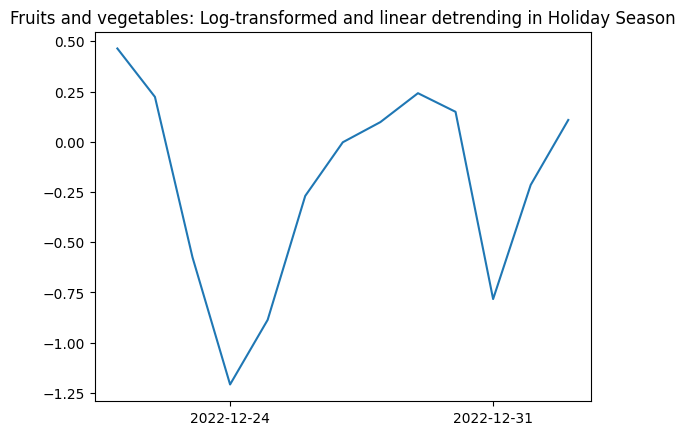

In [ ]:
holiday_2023 = prod_agg.loc[(prod_agg.index < '2023-01-03') & (prod_agg.index > '2022-12-20')]
plt.plot(holiday_2023['sales'] -linear.predict(holiday_2023.index.astype(int).to_numpy().reshape(-1, 1)))
plt.title(f'Fruits and vegetables: Log-transformed and linear detrending in Holiday Season')
plt.xticks(['2022-12-24', '2022-12-31'])
plt.show()

It looks like the sales take a dip on the Eves of Christmas and New Year's.

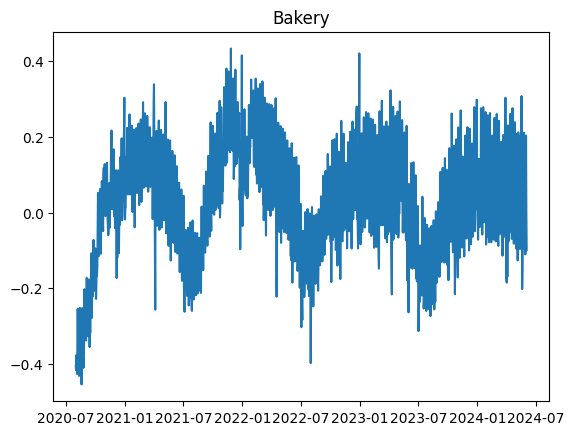

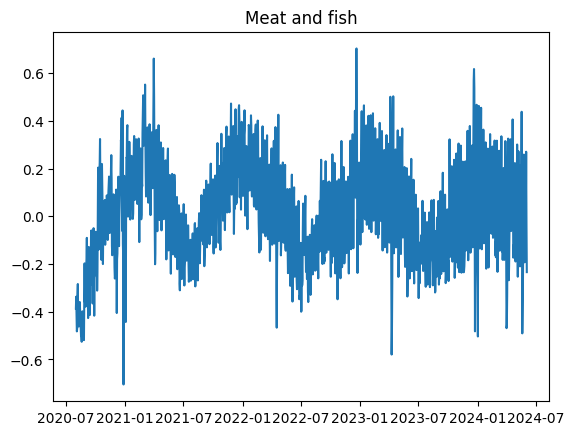

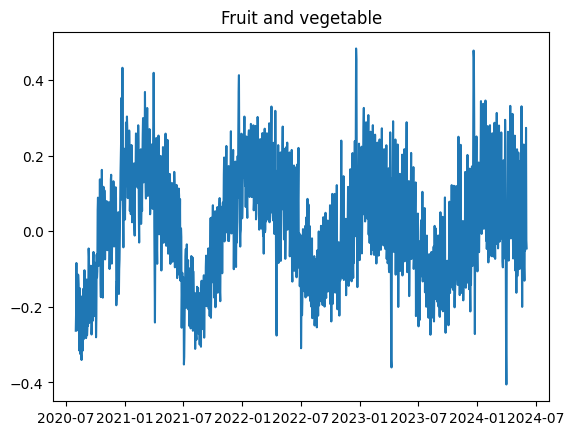

In [ ]:
from sklearn.linear_model import LinearRegression

def engineer(df: pd.DataFrame):
    df['sales'] = df['sales'].apply(lambda x: np.log(1 + x))
    idx = df.index
    df.reset_index(inplace=True)
    df.index = idx
    for date in ['12-23', '12-24', '12-25', '12-26', '12-31', '01-01']:
        df[date] = df['date'].apply(lambda x: int(str(x)[5:10] == date))
    df['date'] = df['date'].astype(int) / 1e11
    df['date'] = (df['date'] - np.min(df['date'])) / 864
    return df[df.columns]

for cat in df['L1'].unique():
    cat_df = df.loc[df['L1'] == cat]
    prod_agg = cat_df[['date', 'sales']].groupby('date').sum()
    data = engineer(prod_agg)
    linear = LinearRegression().fit(data.drop('sales', axis=1), data['sales'])
    plt.plot(data['sales'] - linear.predict(data.drop('sales', axis=1)))
    plt.title(cat)
    plt.show()

Let's add some seasonality.

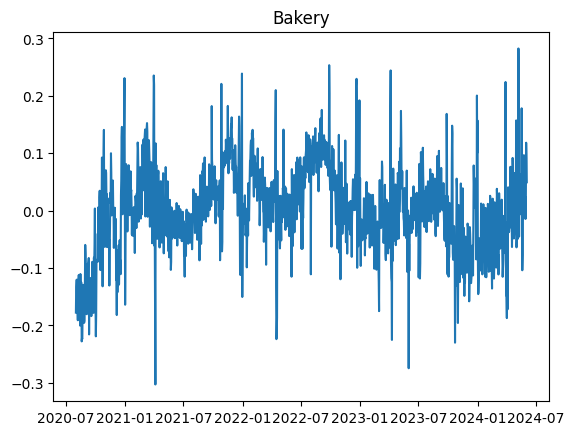

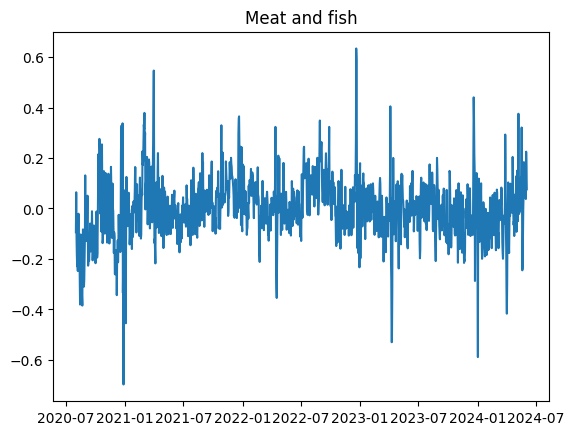

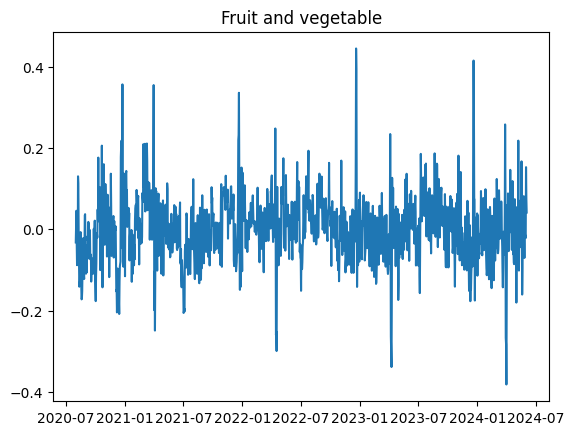

In [ ]:
def weeks(df):
    df['weekday'] = [day.weekday() for day in df.index]
    df = pd.concat([df.drop('weekday', axis=1), pd.get_dummies(df['weekday'], prefix='weekday')], axis=1)
    return df

def seasonality(df):
    df['sin_biyear'] = df['date'].apply(lambda x: np.sin(np.pi * x / 365))
    df['cos_biyear'] = df['date'].apply(lambda x: np.cos(np.pi * x / 365))
    df['sin_year'] = df['date'].apply(lambda x: np.sin(2 * np.pi * x / 365))
    df['cos_year'] = df['date'].apply(lambda x: np.cos(2 * np.pi * x / 365))
    df['sin_year/2'] = df['date'].apply(lambda x: np.sin(4 * np.pi * x / 365))
    df['cos_year/2'] = df['date'].apply(lambda x: np.cos(4 * np.pi * x / 365))
    df['sin_year/3'] = df['date'].apply(lambda x: np.sin(6 * np.pi * x / 365))
    df['cos_year/3'] = df['date'].apply(lambda x: np.cos(6 * np.pi * x / 365))
    df['sin_year/4'] = df['date'].apply(lambda x: np.sin(8 * np.pi * x / 365))
    df['cos_year/4'] = df['date'].apply(lambda x: np.cos(8 * np.pi * x / 365))
    df['sin_monthly'] = df['date'].apply(lambda x: np.sin(24 * np.pi * x / 365))
    df['cos_monthly'] = df['date'].apply(lambda x: np.cos(24 * np.pi * x / 365))
    return df

for cat in df['L1'].unique():
    cat_df = df.loc[df['L1'] == cat]
    prod_agg = cat_df[['date', 'sales']].groupby('date').sum()
    prod_agg = weeks(prod_agg)
    data = engineer(prod_agg)
    data = seasonality(data)
    linear = LinearRegression().fit(data.drop('sales', axis=1), data['sales'])
    plt.plot(data['sales'] - linear.predict(data.drop('sales', axis=1)))
    plt.title(cat)
    plt.show()

How do these work at country level?

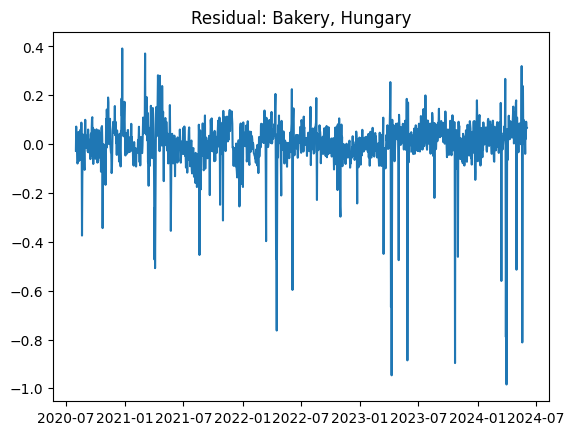

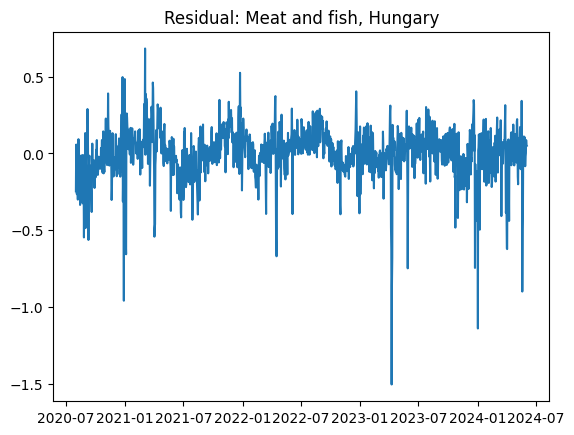

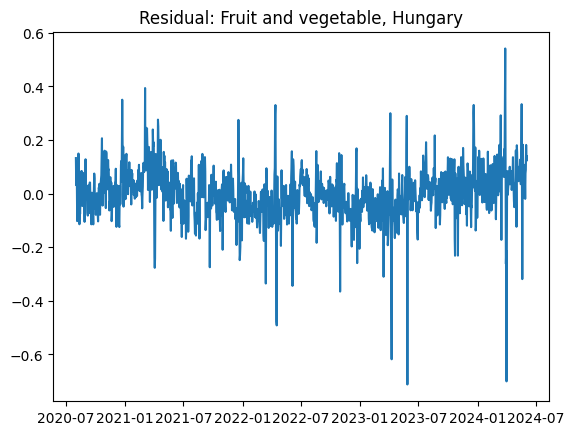

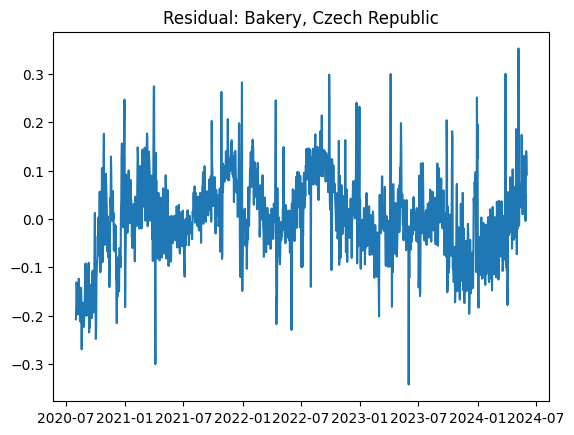

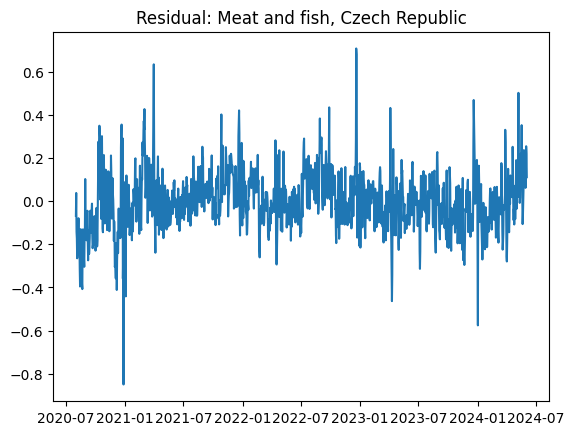

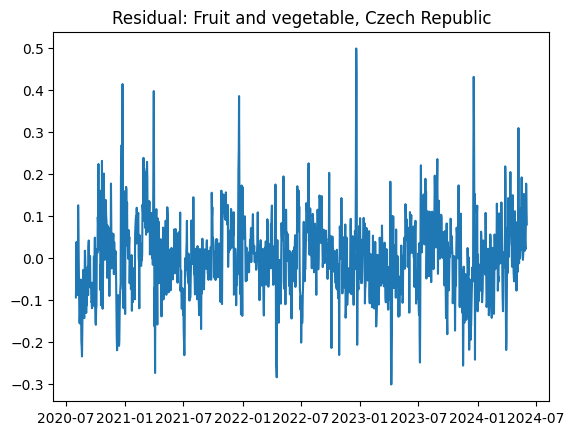

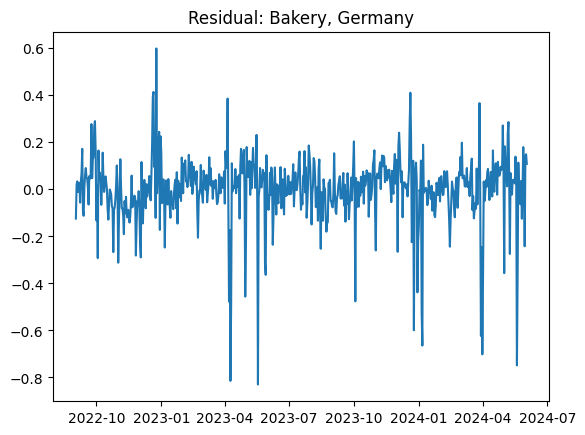

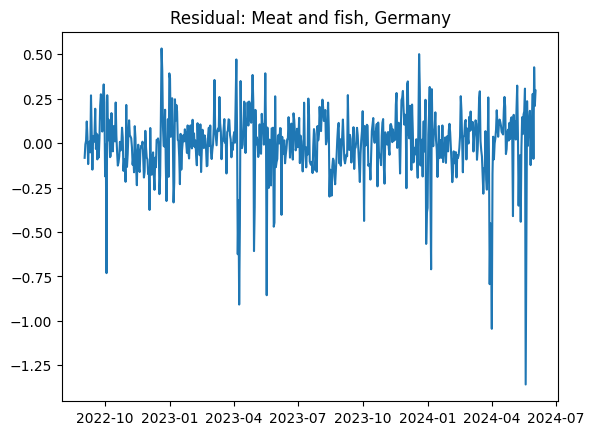

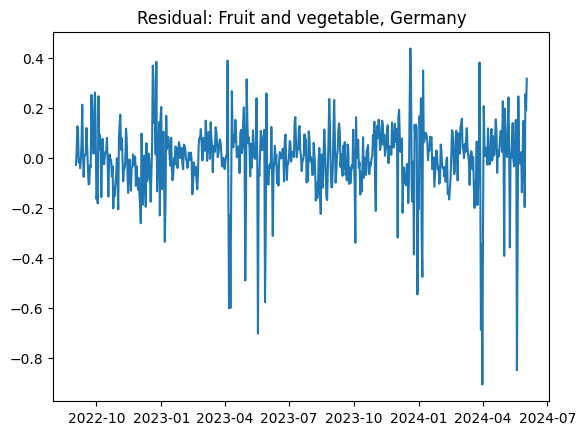

In [ ]:
for country in df['country'].unique():
    country_df = df.loc[df['country'] == country]
    for cat in df['L1'].unique():
        cat_df = country_df.loc[country_df['L1'] == cat]
        prod_agg = cat_df[['date', 'sales']].groupby('date').sum()
        prod_agg = weeks(prod_agg)
        data = engineer(prod_agg)
        data = seasonality(data)
        if country == 'Germany':
            data = data.loc[data.index > '2022-09-01']
        linear = LinearRegression().fit(data.drop('sales', axis=1), data['sales'])
        plt.plot(data['sales'] - linear.predict(data.drop('sales', axis=1)))
        plt.title(f'Residual: {cat}, {country}')
        plt.show()

In [ ]:
import utils as u
all = u.get_train(all_data=True)
all.head()

c:\Users\ttfee\OneDrive\Desktop\Rohlik Sales Forecasting\utils.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('availability', axis=1, inplace=True)
c:\Users\ttfee\OneDrive\Desktop\Rohlik Sales Forecasting\utils.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[discounts] = df[discounts].map(lambda x: np.max(x, 0))
c:\Users\ttfee\OneDrive\Desktop\Rohlik Sales Forecasting\utils.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,unique_id,date,warehouse_x,total_orders,sales,sell_price_main,type_0_discount,type_1_discount,type_2_discount,type_3_discount,...,school_holidays,warehouse_y,events,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en,warehouse
0,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,0.0,0.0,0.0,0.0,...,0,Brno_1,0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,Budapest_1
1,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,0.0,0.0,0.0,0.0,...,0,Prague_1,0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,Budapest_1
2,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,0.0,0.0,0.0,0.0,...,0,Prague_2,0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,Budapest_1
3,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,0.0,0.0,0.0,0.0,...,0,Budapest_1,0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,Budapest_1
4,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,0.0,0.0,0.0,0.0,...,0,Munich_1,0,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,Budapest_1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/sales_train.csv')
df.dropna(inplace=True)

Text(0, 0.5, 'Orders')

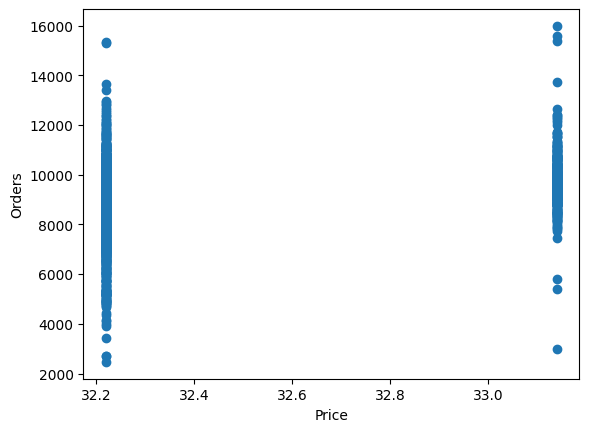

In [ ]:
id = 4901
df_id = df.loc[df['unique_id'] == id]
orders = df_id['total_orders']
price = df_id['sell_price_main']
'''
sales = df_id['sales']
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(price, orders, sales)
ax.set_xlabel('Price')
ax.set_ylabel('Orders')
ax.set_zlabel('Sales')
plt.show()
'''
plt.scatter(price, orders)
plt.xlabel('Price')
plt.ylabel('Orders')

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np


X = df[['total_orders', 'sell_price_main', 'sales']].apply(lambda x: np.log(1e-3 + x))
y = X['sales']
X.drop('sales', axis=1, inplace=True)
model = LinearRegression().fit(X, y)
print(model.intercept_, model.coef_)

NameError: name 'df' is not defined

Jan 13

In [ ]:
from submission import Submission
sub = Submission()

--------------------------------------------------
Processing train data...
--------------------------------------------------
--------------------------------------------------
Feature engineering...
--------------------------------------------------
--------------------------------------------------
Processing test data...
--------------------------------------------------
--------------------------------------------------
Feature engineering...
--------------------------------------------------
--------------------------------------------------
Processing inventory...
--------------------------------------------------
--------------------------------------------------
Integrating inventory data...
--------------------------------------------------
--------------------------------------------------
Processing calendar...
--------------------------------------------------
--------------------------------------------------
Integrating calendar data...
----------------------------------

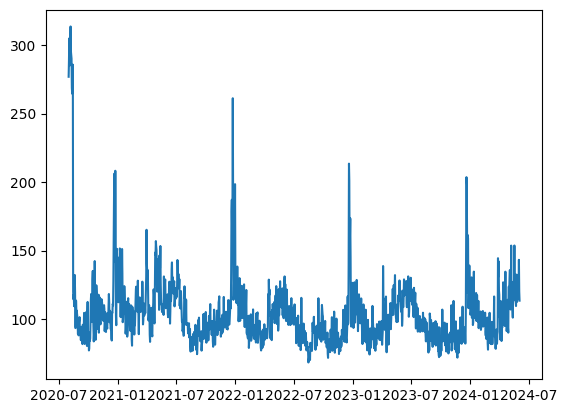

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
frame = sub.train[['sales', 'date', 'unique_id', 'weekday_trend', 'weight']].copy()
frame['resid'] = frame['sales'] - frame['weekday_trend']
frame['resid'] *= frame['weight']
frame['resid'] = frame['resid'].apply(np.abs)
dated = frame[['date', 'resid']].groupby('date').mean().reset_index()
plt.plot(dated['date'], dated['resid'])

C:\Users\ttfee\AppData\Local\Temp\ipykernel_29428\2696753653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['wt_trend'] = dat['weekday_avg_sales'] * dat['weight']


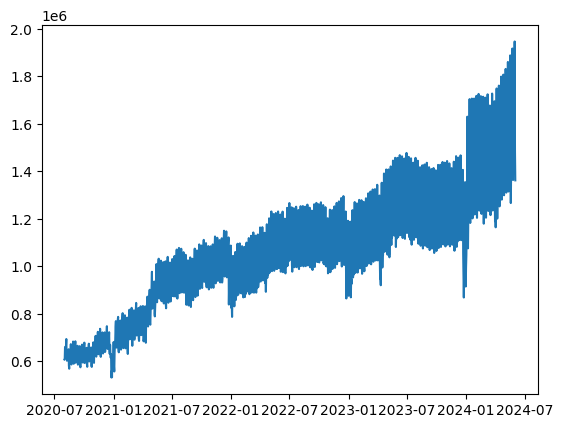

In [ ]:
dat = sub.train[['date', 'weekday_avg_sales', 'weight']]
dat['wt_trend'] = dat['weekday_avg_sales'] * dat['weight']
grouped = dat[['wt_trend', 'date']].groupby('date').sum().reset_index()
plt.plot(grouped['date'], grouped['wt_trend'])

In [ ]:
from encoding2 import spectral_encode
spectral_encode()

Investigate values for n >/< 60 and divide work among cases. Save as dataframe with zero for coefs not used.

In [1]:
from preprocessing import Validator
sub = Validator(dates=[('06-03-2024', '06-04-2024')])

In [ ]:
nec_cols = ['product_sales_14', 'product_sales_21', 'product_sales_28', 'product_sales_35',
            'weekday_avg_sales', 'week_trend', 'week_moving_trend', 'moving', 'normed_week_mean',
            'normed_week_median'] + [f'lag_{i}' for i in [14, 21, 28, 35]]

tra, _ = sub.tvals[0]
small = tra[['unique_id', 'date']].groupby('unique_id', observed=True).count().reset_index().rename(columns={'date' : 'n_many'})
small = small.loc[small['n_many'] <= 20]
df = tra.merge(small, how='inner', on='unique_id')
df = df.sort_values(['unique_id', 'date'])
display(df[['unique_id', 'date'] + nec_cols + ['sales']].tail(20))

smol_cols = ['weekday_avg_sales']

,unique_id,date,product_sales_14,product_sales_21,product_sales_28,product_sales_35,weekday_avg_sales,week_trend,week_moving_trend,moving,normed_week_mean,normed_week_median,lag_14,lag_21,lag_28,lag_35,sales
3,5367,2024-06-01,380.84,0.0,0.0,0.0,106.280824,168.212484,256.761075,262.266667,131.145143,0.0,393.435430,0.0,0.0,0.0,188.44
16,5367,2024-06-02,125.53,0.0,0.0,0.0,106.904981,169.200347,224.605858,228.082500,41.270364,0.0,123.811093,0.0,0.0,0.0,86.85
79,5368,2024-05-16,0.00,0.0,0.0,0.0,110.512345,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,24.94
81,5368,2024-05-17,0.00,0.0,0.0,0.0,130.876666,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,100.35
92,5368,2024-05-18,0.00,0.0,0.0,0.0,106.280824,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,32.98
78,5368,2024-05-19,0.00,0.0,0.0,0.0,106.904981,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,35.62
82,5368,2024-05-20,0.00,0.0,0.0,0.0,102.806690,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,72.08
90,5368,2024-05-21,0.00,0.0,0.0,0.0,101.795829,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,22.05
76,5368,2024-05-22,0.00,0.0,0.0,0.0,100.278062,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,9.24
87,5368,2024-05-23,0.00,0.0,0.0,0.0,110.512345,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,27.45


In [15]:
import pandas as pd
pd.read_csv('./data/sales_test.csv')['date'].unique().tolist()

['2024-06-03',
 '2024-06-11',
 '2024-06-13',
 '2024-06-15',
 '2024-06-09',
 '2024-06-06',
 '2024-06-12',
 '2024-06-05',
 '2024-06-04',
 '2024-06-08',
 '2024-06-07',
 '2024-06-14',
 '2024-06-16',
 '2024-06-10']

In [1]:
from grouped_forecast import Grouped
grp = Grouped()
grp.build_prediction()
grp.get_training_errors()

c:\Users\ttfee\OneDrive\Desktop\Rohlik Sales Forecasting\.venv\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7480
[LightGBM] [Info] Number of data points in the train set: 527467, number of used features: 43
[LightGBM] [Info] Start training from score 13877.180974
[100]	train's l1: 7864.91
[200]	train's l1: 3839.52
[300]	train's l1: 2555.22
[400]	train's l1: 2131.51
[500]	train's l1: 1931.41
[600]	train's l1: 1787.09
[700]	train's l1: 1693.78
[800]	train's l1: 1638.75
[900]	train's l1: 1598.56
[1000]	train's l1: 1569.65
[1100]	train's l1: 1547.83
[1200]	train's l1: 1528.35
[1300]	train's l1: 1510.73
[1400]	train's l

In [7]:
import gc
params = {
    'learning_rate': 0.01,
    'num_leaves': 10,  # 100,  # 150
    'subsample': 0.7057135664023435,
    'colsample_bytree': 0.8528497905459008,
    'reg_alpha': 0.036786449788597686,
    'reg_lambda': 0.3151110021900479,
    'num_boost_round': 20000,
    'objective': 'regression',
    'metric': 'mae',
    'boosting_type': 'gbdt'
}
gc.collect()
grp.build_model(params=params)

c:\Users\ttfee\OneDrive\Desktop\Rohlik Sales Forecasting\.venv\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.091481 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7476
[LightGBM] [Info] Number of data points in the train set: 513416, number of used features: 43
[LightGBM] [Info] Start training from score 13716.440710
[100]	train's l1: 7786.89	valid's l1: 11225.9
[200]	train's l1: 3783.23	valid's l1: 6254.6
[300]	train's l1: 2511.43	valid's l1: 4474.26
[400]	train's l1: 2081.81	valid's l1: 3772.95
[500]	train's l1: 1892.3	valid's l1: 3411.57
[600]	train's l1: 1748.44	valid's l1: 3153.71
[700]	train's l1: 1661.45	valid's l1: 2997.64
[800]	train's l1: 1608.52	valid's l1: 2891.71
[900]	train's l1: 1572.57	valid's l1: 2831.64
[1000]	tra

KeyboardInterrupt: 

In [2]:
print(grp.group_df.columns.to_list())

['id', 'date', 'sales', 'type', 'year', 'day', 'dayofweek', 'weekend', 'weekday_freq', 'dayofyear', 'holiday', 'shops_closed', 'winter_school_holidays', 'school_holidays', 'days_to_holiday', 'days_to_shops_closed', 'day_after_closing', 'holiday_name', 'prev_month_avg', 'std_hol_sales', 'log_cv', 'weekday_avg_sales', 'weekday_frac_sales', 'week_trend', 'GTE_type', 'product_sales_14', 'product_sales_15', 'product_sales_16', 'product_sales_17', 'product_sales_18', 'product_sales_19', 'product_sales_20', 'product_sales_21', 'product_sales_28', 'product_sales_35', 'product_sales_42', 'product_sales_63', 'product_sales_91', 'product_sales_182', 'product_sales_364', 'moving', 'week_moving_trend', 'normed_week_mean', 'normed_week_median', 'trend', 'top_discount', 'discount_price', 'discount_amount', 'total_pred_sales', 'total_pred_discount_sales', 'order_price_ratio', 'order_discount_ratio', 'log_discount_amount', 'log_discount_price', 'log_sell_price_main', 'log_total_pred_sales', 'log_total_

In [3]:
import pandas as pd
import gc
from tqdm import tqdm
import cvxpy as cp

gc.collect()

def mae_reg(X: pd.DataFrame, y: pd.Series):
    X_np = X.to_numpy()
    y_np = y.to_numpy()

    _, d = X_np.shape
    beta = cp.Variable(d)
    intercept = cp.Variable()

    residuals = y_np - (X_np @ beta + intercept)
    objective = cp.Minimize(cp.sum(cp.abs(residuals)))
    problem = cp.Problem(objective)
    problem.solve()

    return beta.value, intercept.value

nec_cols = ['prev_month_avg', 'weekday_avg_sales', 'week_trend', 'product_sales_14', 'product_sales_15', 'product_sales_16', 
            'product_sales_17', 'product_sales_18', 'product_sales_19', 'product_sales_20', 'product_sales_21', 'product_sales_28',
            'product_sales_35', 'product_sales_42', 'product_sales_63', 'product_sales_91', 'product_sales_182', 'product_sales_364', 
            'moving', 'week_moving_trend', 'normed_week_mean', 'normed_week_median']

df = grp.group_df[['id', 'sales'] + nec_cols]

ids = df['id'].unique().tolist()

dict = {}
for id in tqdm(ids):
    beta, intercept = mae_reg(
        df.loc[df['id'] == id, nec_cols], df.loc[df['id'] == id, 'sales'])
    dict[id] = {
        'id': id,
        **{'coef_' + col: coef for col, coef in zip(nec_cols, beta)},
        'intercept': intercept
    }

df = pd.DataFrame(dict).T
display(df)
df.to_csv('./trend_coefs_grouped.csv', index=False)

100%|██████████| 421/421 [01:45<00:00,  4.00it/s]


,id,coef_prev_month_avg,coef_weekday_avg_sales,coef_week_trend,coef_product_sales_14,coef_product_sales_15,coef_product_sales_16,coef_product_sales_17,coef_product_sales_18,coef_product_sales_19,...,coef_product_sales_42,coef_product_sales_63,coef_product_sales_91,coef_product_sales_182,coef_product_sales_364,coef_moving,coef_week_moving_trend,coef_normed_week_mean,coef_normed_week_median,intercept
Apple,Apple,0.206614,1.846469,-0.356147,-0.295409,-0.56579,-0.418103,-0.426425,-0.396764,-0.483484,...,0.055896,0.000523,-0.048719,-0.085294,0.17585,0.444736,-0.27143,3.510188,-0.296202,-12826.033299767829
Apricot,Apricot,1.948791,0.516201,-1.742449,0.064051,0.001961,0.051427,0.027944,-0.01505,0.023616,...,-0.103548,-0.189056,-0.03653,0.049076,-0.156661,-0.316023,0.440793,0.036982,-0.01846,-5171.808654411186
Arugula,Arugula,0.182833,0.158664,0.032573,0.084267,0.004121,0.013625,0.037302,0.009059,-0.010815,...,0.039686,0.024883,0.063843,-0.038524,0.015722,0.321627,-0.536435,-0.005913,-0.028583,-777.9802618172228
Asparagus,Asparagus,0.946593,0.035707,-0.811458,0.830913,0.18281,0.117954,0.026929,-0.022821,-0.097152,...,-0.055545,0.04408,-0.015768,-0.00295,0.12514,-1.336183,0.766167,0.200569,0.022066,-361.516924481195
Avocado,Avocado,-0.022976,0.588972,0.026994,0.058571,0.013175,0.013364,0.06264,0.065344,0.006666,...,0.057063,0.063837,0.041022,-0.03991,0.232843,0.044667,-0.016658,-0.002082,-0.15312,514.2041235828782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Budapest,Budapest,0.03089,3.958168,0.064817,0.040171,0.063473,-0.01465,-0.08455,-0.028604,-0.023607,...,-0.009227,-0.004194,0.038152,-0.074118,0.024654,0.546809,-0.101008,0.029904,0.108835,-19278.795174805102
Frankfurt,Frankfurt,-0.037577,1.235797,0.017595,0.152173,-0.03841,-0.078803,0.074101,-0.019415,0.106641,...,-0.062201,0.001382,0.064405,-0.02054,0.100263,-0.191874,0.291457,0.047698,0.196923,-8029.200038052967
Munich,Munich,-1.324159,1.295979,1.595342,0.282909,-0.004888,-0.086971,0.066988,-0.015893,0.096798,...,0.052952,-0.006215,0.057761,-0.06663,0.080467,0.603331,-0.770337,0.164167,0.153221,-12654.520689659683
Prague,Prague,0.856534,8.490704,-0.918189,0.162346,-0.064502,0.115507,0.005541,0.003043,-0.06254,...,-0.009694,0.002745,-0.003685,-0.027732,0.032222,-1.022352,1.168485,0.150734,0.005511,14734.637019667485


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import cvxpy as cp

def mae_reg(X: pd.DataFrame, y: pd.Series):
    X_np = X.to_numpy()
    y_np = y.to_numpy()

    _, d = X_np.shape
    beta = cp.Variable(d)
    intercept = cp.Variable()

    residuals = y_np - (X_np @ beta + intercept)
    objective = cp.Minimize(cp.sum(cp.abs(residuals)))
    problem = cp.Problem(objective)
    problem.solve()

    return beta.value, intercept.value

def importance(X: pd.DataFrame, beta):
    means = X.T.mean(axis=1).reset_index()
    means.columns = ['feature', 'mean']
    means['coef'] = beta
    means['importance'] = np.abs(means['coef'] * means['mean'])
    means['importance'] = means['importance'] / means['importance'].sum()
    means.index = means['feature']
    return means['mean']

nec_cols = ['product_sales_14', 'product_sales_21', 'product_sales_28', 'product_sales_35', 
            'weekday_avg_sales', 'week_trend', 'week_moving_trend', 'moving', 'normed_week_mean', 
            'normed_week_median'] + [f'lag_{i}' for i in [14, 21, 28, 35]]

tra, _ = sub.tvals[0]
size = tra[['unique_id', 'date']].groupby('unique_id', observed=True).count(
).reset_index().rename(columns={'date': 'n_many'})
small = size.loc[size['n_many'] < 60]
big   = size.loc[size['n_many'] >= 60]
lil_df = tra.merge(small, how='inner', on='unique_id')[['unique_id', 'sales'] + nec_cols]
big_df = tra.merge(big, how='inner', on='unique_id')[['unique_id', 'sales'] + nec_cols]

big_ids = big_df['unique_id'].unique().tolist()
lil_ids = lil_df['unique_id'].unique().tolist()

dict = {}
for id in tqdm(big_ids):
    beta, intercept = mae_reg(big_df.loc[big_df['unique_id'] == id, nec_cols], big_df.loc[big_df['unique_id'] == id, 'sales'])
    dict[id] = {
        'unique_id': id,
        **{'coef_' + col: coef for col, coef in zip(nec_cols, beta)},
        'intercept': intercept
    }

smol_cols = ['weekday_avg_sales']
non_cols = nec_cols.copy()
non_cols.remove('weekday_avg_sales')
for id in tqdm(lil_ids):
    beta, intercept = mae_reg(lil_df.loc[lil_df['unique_id'] == id, smol_cols], lil_df.loc[lil_df['unique_id'] == id, 'sales'])
    dict[id] = {
        'unique_id': id,
        **{'coef_' + col: coef for col, coef in zip(smol_cols, beta)},
        **{'coef_' + col: 0 for col in non_cols},
        'intercept': intercept
    }

df = pd.DataFrame(dict).T
df['unique_id'] = df['unique_id'].astype(int)
display(df)
df.to_csv('./trend_coefs_new.csv', index=False)

'''

constant = 58500
for id in tqdm(ids):
    id_df = train.loc[train['unique_id'] == id]
    X = id_df[nec_cols]
    y = id_df['sales']
    alpha = constant * np.var(y) / (len(nec_cols) * np.sqrt(len(y)))
    fitted = Ridge(alpha=alpha).fit(X, y)
    dict[id] = {
        'unique_id': id,
        **{'coef_' + col: coef for col, coef in zip(nec_cols, fitted.coef_)},
        'intercept': fitted.intercept_
    }
df = pd.DataFrame(dict).T
gc.collect()
df['unique_id'] = df['unique_id'].astype(int)
display(df)
df.to_csv('./trend_coefs.csv', index=False)
'''

100%|██████████| 75/75 [00:00<00:00, 133.37it/s]


NameError: name 'gc' is not defined

In [4]:
df['unique_id'] = df['unique_id'].astype(int)
display(df)
df.to_csv('./trend_coefs_new.csv', index=False)

,unique_id,coef_product_sales_14,coef_product_sales_21,coef_product_sales_28,coef_product_sales_35,coef_weekday_avg_sales,coef_week_trend,coef_week_moving_trend,coef_moving,coef_normed_week_mean,coef_normed_week_median,coef_lag_14,coef_lag_21,coef_lag_28,coef_lag_35,intercept
4845,4845,-0.203317,-0.218063,-0.034514,-0.032333,-0.113814,0.046936,0.92807,-0.306101,-0.251829,-0.001766,0.300576,0.276242,0.087137,0.057296,18.377781270241176
4829,4829,-0.06798,-0.237171,-0.123357,-0.16932,0.046314,0.290782,0.488361,-0.040349,-0.534911,0.228531,0.237447,0.31653,0.216524,0.34699,-4.132442076313289
1755,1755,-0.215079,0.001305,-0.188686,-0.119644,0.247697,0.364438,0.062493,-0.224234,-0.157087,0.502108,0.367708,0.079065,0.225468,0.060505,-12.82451471528134
2915,2915,-0.230009,-0.139658,0.005737,-0.161641,0.39684,0.301223,-0.427256,0.445685,0.081722,0.260364,0.178517,0.068563,-0.019903,0.120554,-26.82787516133788
2706,2706,-0.151051,0.002803,0.000782,-0.002072,0.98275,-0.039841,-0.274793,0.263677,-0.075999,0.569954,0.223859,-0.041714,0.005988,0.017911,-105.61903797177834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,773,0,0,0,0,5.498169,0,0,0,0,0,0,0,0,0,-428.67990347289833
4940,4940,0,0,0,0,0.417316,0,0,0,0,0,0,0,0,0,-18.56627783228772
1836,1836,0,0,0,0,2.352578,0,0,0,0,0,0,0,0,0,37.03924182029464
3290,3290,0,0,0,0,1.864874,0,0,0,0,0,0,0,0,0,-98.40450792162393
